Nour El Orabi \
Lobna Aboudoma

In [1]:
import numpy as np
import pandas as pd
from random import seed
from random import random
import matplotlib.pyplot as plt
import scipy.linalg as la
from sympy import *
import seaborn as sns
import numpy as np
import random
import sklearn
from sklearn import preprocessing

## <center> FACTORS AFFECTING CONVERGENCE RATE IN MARKOV CHAINS MONTE CARLO <center>

### HELPER FUNCTIONS

In [388]:
def print_statistics(list1, list2 , name=[0,1]):
    df1 = pd.DataFrame(data = list1, columns = ['List1'])
    df2 = pd.DataFrame(data = list2, columns = ['List2'])
    d1 = df1.describe()
    d1 = d1.iloc[:,0]
    d2 = df2.describe()
    d2 = d2.iloc[:,0]
    df3 = pd.DataFrame(data = zip(d1,d2), columns = [name[0], name[1]])
    df3 = df3.set_index(pd.Index(['Count','Mean','Stdev','Minimum','25%','50%','75%','Max']))
    return df3

In [505]:
def print_statistics2(list_, names):
    a = [[]]
    #names = ['pr0','pr1','pr2','pr3']
    for i in range(len(names)):
        df = pd.DataFrame(data = list_[i])
        d = df.describe()
        d = np.array(d.iloc[:,0])
        d = d.tolist()
        an_array = np.array(list_[i])
        mean, standard_deviation  = np.mean(an_array), np.std(an_array) 
        distance_from_mean = abs(an_array - mean)
        max_deviations = 3
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = an_array[not_outlier]
        d.append(len(list_[i])-len(no_outliers))
        a.append(d)
    df3 = pd.DataFrame(data = a)
    df3 = df3.transpose()
    df3 = df3.drop(columns = 0)
    df3.columns = names
    df3 = df3.set_index(pd.Index(['Count','Mean','Stdev','Minimum','25%','50%','75%','Max','Outliers']))
    return df3


In [416]:
# Removes outliers that are the 3 standard deviations away from the mean, to get a better look at the distribution
def remove_outliers(list):
    an_array = np.array(list)
    mean = np.mean(an_array)
    standard_deviation = np.std(an_array)
    distance_from_mean = abs(an_array - mean)
    max_deviations = 3
    not_outlier = distance_from_mean < max_deviations * standard_deviation
    no_outliers = an_array[not_outlier]
    return no_outliers

In [10]:
# Reducibility is being able to return to a state once the simulation starts
def check_reducibility(p):
    for i in range(len(p)):
        if(np.count_nonzero(p[i,:]==0)>1 or np.count_nonzero(p[:,i]==0)>1):
            return 1
        else:
            return 0          

### GENERATE MATRIX AND STATE

In [7]:
# Generates a random matrix
def gen_matrix(n):
    # Start off with a matrix of zeros
    result=np.zeros((n,n))
    # generate random numbers from a uniform distribution and add them to the matrix
    result = result + np.random.uniform(low=2, high=5, size=(n, n))
    # Normalize the matrix to have rows with sum = 1 for it to be a stochastic matrix
    result = result / result.sum(axis=1, keepdims=1)
    return result

In [44]:
def gen_matrix2(n):
    # Start off with a matrix of zeros
    result = np.zeros((n,n))
    # generate random numbers from a uniform distribution and add them to the matrix
    result = result + np.random.uniform(low=0, high=0.25, size=(n, n))
    # round the values in the matrix to increase the probability of getting zeros
    result = np.around(result, decimals=1)
    # Normalize the matrix to have rows with sum = 1 for it to be a stochastic matrix
    result = sklearn.preprocessing.normalize(result, norm="l1")
    return result

In [55]:
def gen_matrix3(n):
    # create a variable that will store a random number deciding whether the matrix will be 
    aperiodic = np.random.randint(0,2)
    result = np.zeros((n,n))
    result = result + np.random.uniform(low=0, high=0.25, size=(n, n))
    result = np.around(result, decimals=1)
    if(aperiodic == 1):
        np.fill_diagonal(result, np.zeros(n))
    result = sklearn.preprocessing.normalize(result, norm="l1")
    return result

In [14]:
# Generate random initial state
def gen_state(n):
    # takes the number of states and creates a list of zeros with the same size
    state = [[0]*n]
    state = np.array(state)
    # randomly choose a position in the list as the inital state
    state[:,np.random.randint(0,n)] = 1
    return state

### GET CONVERGENCE

In [15]:
def convergence(p, state,n):
    # User input:
        # p: NxN Matrix
        # state: Initial state
        # n:Number of states 
    stateHist=state
    #dfStateHist=pd.DataFrame(state)
    distr_his = np.array([[0] * n])
    #create boolean variable reached that will stay false until the difference between the distribution in two iterations
    # is 0.00001 and i will be a counter for the number of iterations it takes to reach the stationary distribution
    reached = False
    i = 0
    while(reached == False):
        # set a limit for the number of iterations, anything greater than 2000 we will conclude that it does not converge
        if(i>=2000):
            return i
        # increment the counter
        i = i+1
        # check the difference between the distributions in two iterations to check whether it converged or not
        y = state-np.dot(state,p) 
        if(abs(y.all())<=0.00001):
            reached = True
            continue
        # in the case that it didn't converge, multiply the curent distribution with the transition matrix 
        state=np.dot(state,p)
        # append the new distribution to the 2d array
        stateHist=np.append(stateHist,state,axis=0)
        dfDistrHist = pd.DataFrame(stateHist)
    # return the counter for the number of iterations it takes to reach the stationary distribution
    return(i)


# Factors Affecting Convergence Rate

## 1. Multiplicity of Eigenvalues

In [706]:
def check_multiplicity(mat):
    # Get the eignvalues and eigenvectors from the matrix
    values, vectors= la.eig(mat.T)
    values = values.real
    # Get unique values and counts
    unique,indices,counts = np.unique(values,return_counts=True,return_index=True)
    #Check if eigenvalues are unique by checking if the number of the unique values = number of columns in the matrix
    # This would mean that each column has a corresponding unique eigenvalue
    if(len(counts)==len(mat)):

        return 0
    #eigenvalues are not unique, multiplicity >1
    else: 
        #print(counts)
        return 1

In [718]:
def check_multiplicity2(mat):
    # Get the eignvalues and eigenvectors from the matrix
    values, vectors= la.eig(mat.T)
    values = values.real
    # Get unique values and counts
    unique,indices,counts = np.unique(values,return_counts=True,return_index=True)
    #Check if eigenvalues are unique by checking if the number of the unique values = number of columns in the matrix
    # This would mean that each column has a corresponding unique eigenvalue
    #eigenvalues are not unique, multiplicity >1
    if(counts[0]>1): 
        return 0

    else: 
        return 1

In [763]:
def multiplicity(n):
    #create two empty lists to store values in 
    unique = []
    not_unique = []
    for i in range(1000):
        # randomly generate a matrix and initial state
        p = gen_matrix2(n)
        state = gen_state(n)
        #Check multiplicity of the eigenvalues of the matrix p
        mult = check_multiplicity(p)
        #Depending on whether the eigenvalues are unique or not, we will add the convergence rate to the corresponding
        #list
        if(mult==0):
            unique.append(convergence(p,state,n))
        elif(mult==1):
            not_unique.append(convergence(p,state,n))    
    # Plotting Distributions
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (24, 6))
    sns.histplot(data=remove_outliers(not_unique), ax=ax1,color='teal')
    sns.histplot( data=remove_outliers(unique), ax=ax2,color='teal')
    ax1.set_title('Non Unique Eigenvalues',fontsize=20)
    ax1.set_xlabel('Convergence Point',fontsize=15)
    ax1.set_ylabel('Count',fontsize=15)
    ax1.grid()
    ax2.set_title('Unique Eigenvalues',fontsize=20)
    ax2.set_xlabel('Convergence Point',fontsize=15)
    ax2.set_ylabel('Count',fontsize=15)
    ax2.grid()
    # Print statistics for the convergence points of both Unique and non-unique eigenvalues
    return print_statistics2([not_unique], [ 'Non-Unique'])


,Unique,Non-Unique
Count,773.000000,227.000000
Mean,50.371281,15.484581
Stdev,226.278791,16.215187
Minimum,1.000000,1.000000
25%,1.000000,1.000000
50%,20.000000,4.000000
75%,35.000000,27.000000
Max,2000.000000,66.000000
Outliers,11.000000,1.000000


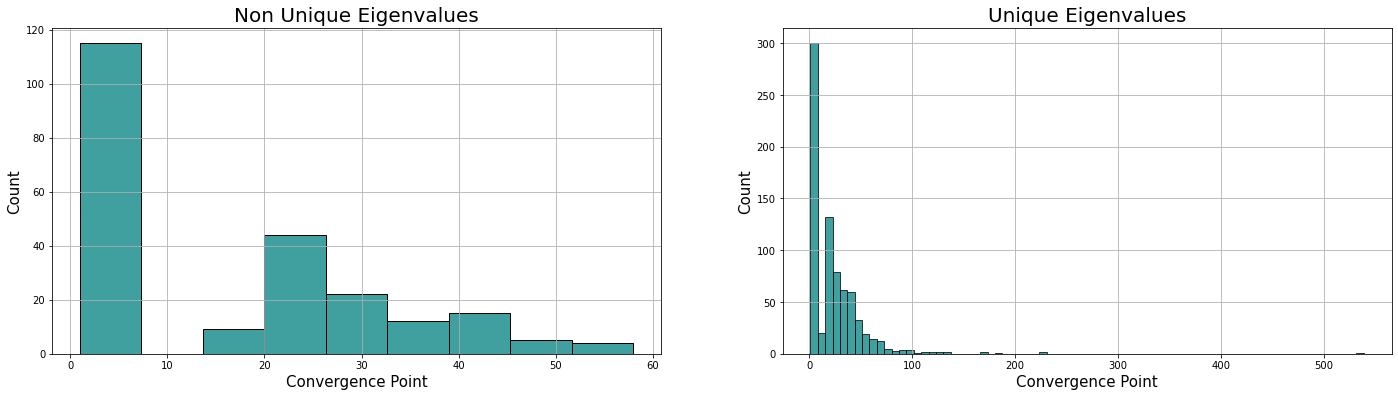

In [760]:
multiplicity(3)  #multiplicity function with state or matrix size of 6  

,Unique,Non-Unique
Count,43.000000,957.000000
Mean,11.395349,9.703239
Stdev,14.568622,13.011088
Minimum,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,27.500000,24.000000
Max,41.000000,65.000000
Outliers,0.000000,2.000000


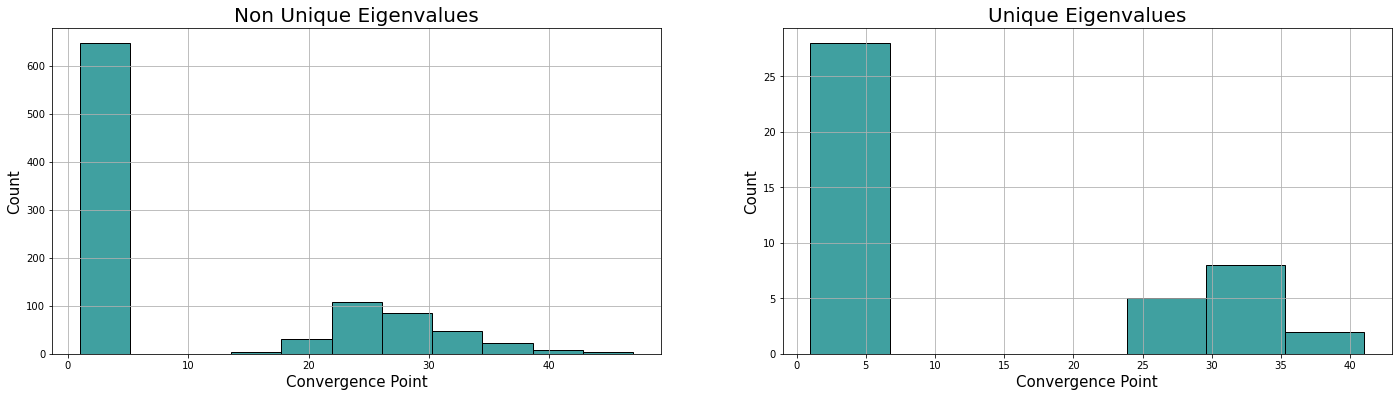

In [761]:
multiplicity(6) #multiplicity function with state or matrix size of 3  

/Users/lobna/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/lobna/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/lobna/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/lobna/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/Users/lobna/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Non-Unique
Count,1000.000000
Mean,3.849000
Stdev,7.486404
Minimum,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
Max,30.000000
Outliers,14.000000


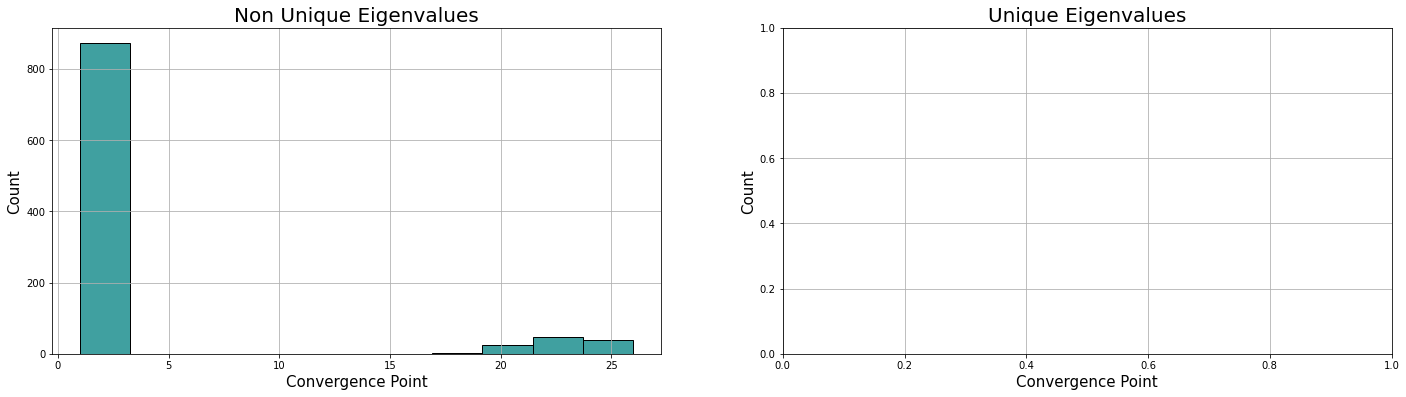

In [764]:
multiplicity(10)  #multiplicity function with state or matrix size of 10

## 2. Effect of Irreducibility on Convergence

In [592]:
def check_irreducible(mat):
    mp = matrix_power(gen_matrix2(3), 4)
    return np.count_nonzero(mp == 0)

In [615]:
def irreducible(n):
    #create two empty lists to store values in 
    reducible_ = []
    irreducible_ = []
    for i in range(1000):
        # randomly generate a matrix and initial state
        p = gen_matrix2(n)
        state = gen_state(n)
        red = check_irreducible(p)
        if(red==0):
            irreducible_.append(convergence(p,state,n))
        elif(red!=0):
            reducible_.append(convergence(p,state,n))
    print_statistics(reducible_, irreducible_, ['Reducible', 'Irreducible'])
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (24, 6))
    sns.histplot(data=remove_outliers(reducible_), ax=ax1,color='teal')
    sns.histplot( data=remove_outliers(irreducible_), ax=ax2,color='teal')
    ax1.set_title('Reducible',fontsize=20)
    ax1.set_xlabel('Convergence Point',fontsize=15)
    ax1.set_ylabel('Count',fontsize=15)
    ax1.grid()
    ax2.set_title('Irreducible',fontsize=20)
    ax2.set_xlabel('Convergence Point',fontsize=15)
    ax2.set_ylabel('Count',fontsize=15)
    ax2.grid()
    fig.suptitle("Convergence Point of Reducible vs Irreducible \nMarkov Chains \n ", fontsize = 20)
    return print_statistics2([reducible_,irreducible_],['Reducible', 'Irreducible'])

,Reducible,Irreducible
Count,180.000000,820.000000
Mean,40.511111,49.290244
Stdev,195.170417,232.021664
Minimum,1.000000,1.000000
25%,1.000000,1.000000
50%,14.500000,16.000000
75%,29.000000,33.000000
Max,2000.000000,2000.000000
Outliers,3.000000,14.000000


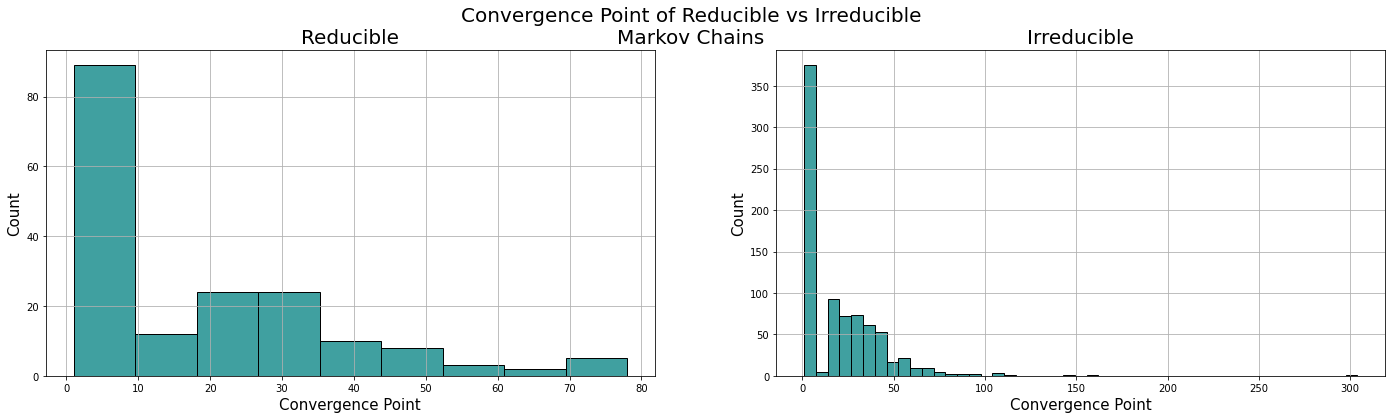

In [624]:
irreducible(3)  #irreducible function with state or matrix size of 3  

,Reducible,Irreducible
Count,197.000000,803.000000
Mean,9.390863,8.494396
Stdev,12.495898,13.264089
Minimum,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,23.000000,21.000000
Max,41.000000,135.000000
Outliers,0.000000,5.000000


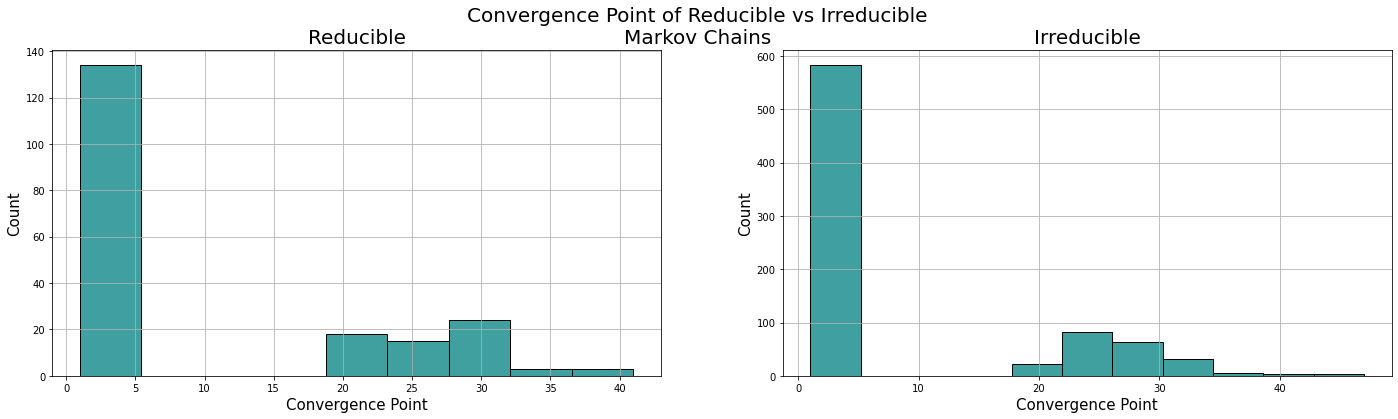

In [632]:
irreducible(6)  #irreducible function with state or matrix size of 6

,Reducible,Irreducible
Count,170.000000,830.000000
Mean,4.464706,4.045783
Stdev,8.025215,7.835789
Minimum,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
Max,26.000000,40.000000
Outliers,0.000000,10.000000


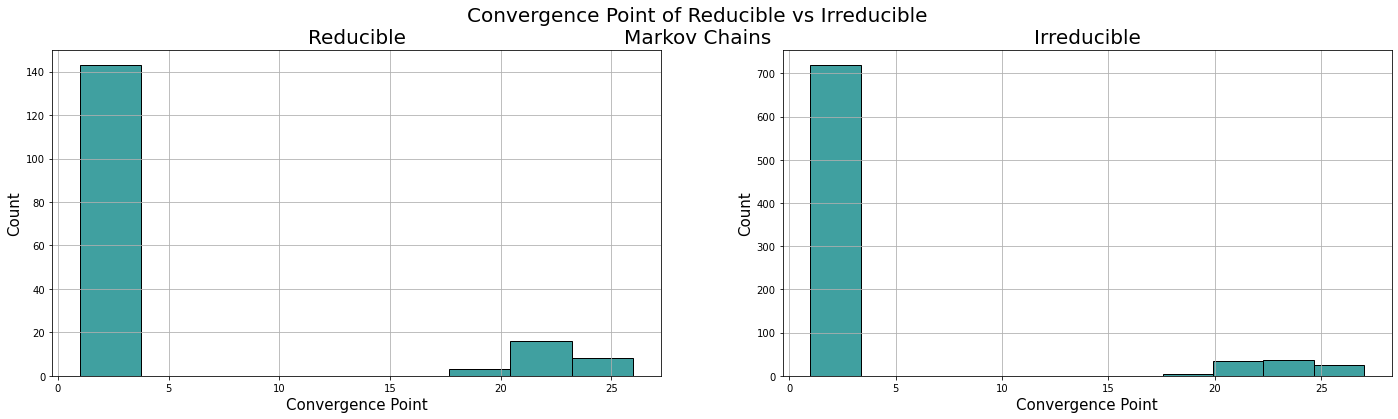

In [633]:
irreducible(10)  #irreducible function with state or matrix size of 10

## 3. Periodic Versus Aperiodic

In [364]:
def get_periodicity(mat):
    # Create an empty list to store the period of each state in
    periods = []
    # Loop over the number of states
    for i in range(len(mat)):
        period = 0
        # If there exists a path from the state returning to the same state, then its period is 1
        if(mat[i,i]!=0):
            periods.append(1)
            continue
        # Check if the sum of the column is 0 then there exists no path returning to the state, 
        # hence period is undefined
        elif((mat[:,i].sum(axis=0)==0)):
            periods.append(0)
            continue
        # Check the connected states if they return back to the state in interest -- i
        else:
            # Get the indices of the non-zero values in the row of the state in interest -i- and store them in an array
            y = np.array(np.nonzero(np.array(mat[i,:])))
            y= y[0,:]
            # Loop over the connected states and check their corresponding row in the matrix 
            for x in y:
                # If the neighboring state is connected to i, then the period is 2 
                if(mat[x,i]!=0):
                    periods.append(2)
                    break
                    continue
            # If the period isn't undefined, 1 , or 2, then the period is 3
            else: 
                periods.append(3)
                continue
    # Return the number of transient states, that have undefined periods
    return np.count_nonzero(np.array(periods) == 1)

In [585]:
def periodic():
    #create two empty lists to store values in 
    pr0 = []
    pr1 = []
    pr2 = []
    pr3 = []
    for i in range(1000):
        # randomly generate a matrix and initial state
        p = gen_matrix2(3)
        state = gen_state(3)
        pr = get_periodicity(p)
       # perds = [0,1,2,3]
      #  indices = [i for i, s in enumerate(perds) if pr in s   
        if(pr==0):
            pr0.append(convergence(p,state,3))
        elif(pr==1):
            pr1.append(convergence(p,state,3))
        elif(pr==2):
            pr2.append(convergence(p,state,3))
        elif(pr==3):
            pr3.append(convergence(p,state,3))            
    
    fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize = (15, 10))
    sns.histplot(data=remove_outliers(pr0), ax=ax1,color='teal')
    sns.histplot( data=remove_outliers(pr1), ax=ax2,color='teal')
    sns.histplot(data = remove_outliers(pr2), ax=ax3, color='teal')
    sns.histplot(data = remove_outliers(pr3), ax=ax4, color='teal')
    ax1.set_title('0 Aperiodic States',fontsize=20)
    ax1.set_xlabel('Convergence Point',fontsize=15)
    ax1.set_ylabel('Count',fontsize=15)
    ax1.grid()
    ax2.set_title('1 Aperiodic State',fontsize=20)
    ax2.set_xlabel('Convergence Point',fontsize=15)
    ax2.set_ylabel('Count',fontsize=15)
    ax2.grid()
    ax3.set_title('2 Aperiodic States',fontsize=20)
    ax3.set_xlabel('Convergence Point',fontsize=15)
    ax3.set_ylabel('Count',fontsize=15)
    ax4.set_title('Aperiodic Chain',fontsize=20)
    ax4.set_xlabel('Convergence Point',fontsize=15)
    ax4.set_ylabel('Count',fontsize=15)
    fig.suptitle("Point of Convergence of Markov Chains with \n Varying Number of Aperiodic States \n ", fontsize = 20)
    fig.tight_layout()
    ax4.grid()
    ax3.grid()
    return print_statistics2([pr0, pr1, pr2, pr3], ['0 States','1 State','2 States','Aperiodic'])
    

,0 States,1 State,2 States,Aperiodic
Count,8.000000,95.000000,401.000000,496.000000
Mean,159.125000,156.842105,64.950125,22.235887
Stdev,278.026945,446.211411,281.017717,93.180691
Minimum,1.000000,1.000000,1.000000,1.000000
25%,28.250000,1.000000,1.000000,1.000000
50%,63.500000,2.000000,22.000000,16.000000
75%,113.500000,56.500000,37.000000,25.000000
Max,832.000000,2000.000000,2000.000000,2000.000000
Outliers,0.000000,5.000000,9.000000,2.000000


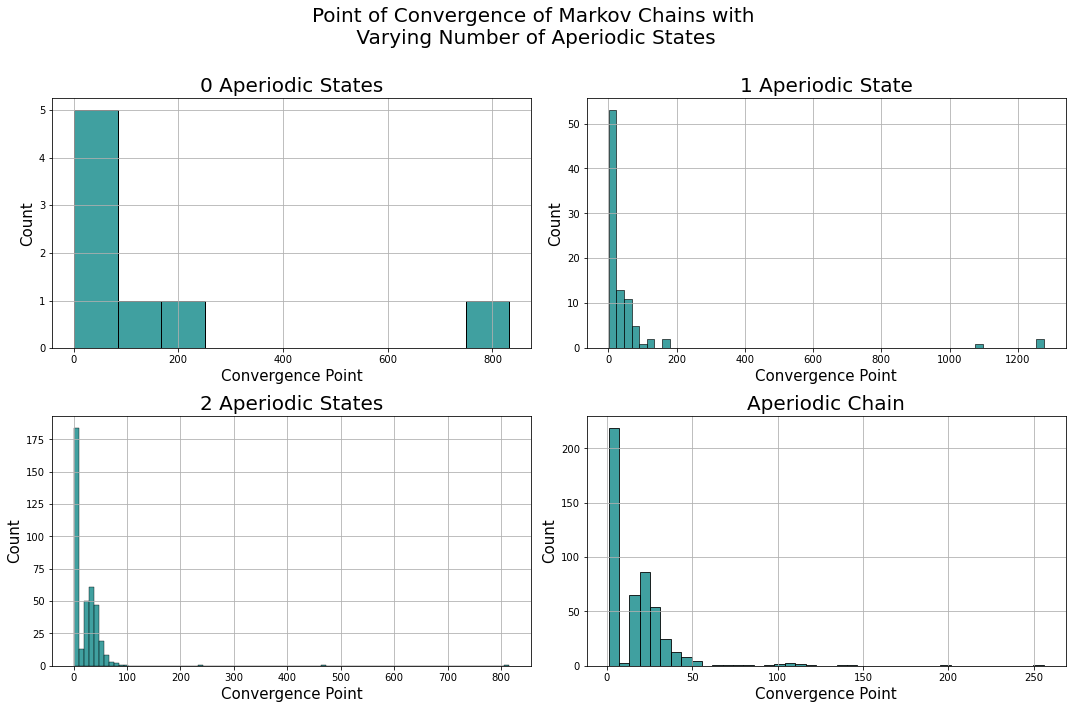

In [637]:
periodic()  #periodic function 

## Transient Versus Recurrent

In [131]:
def check_transient(mat):
    # Loop on all states to check if all states are connected, if there exists one unconnected state then transient
    for i in range(len(mat)):
        for j in range(len(mat)):
            if(check_connected(mat, i,j)==False):
                return 1
    return 0

In [651]:
def check_connected(mat, i, j):
    if((mat[:,i].sum(axis=0)==0)):
        return False
    if(mat[i,j]!=0.0):
        return True
    else:
        y = np.array(np.nonzero(np.array(mat[i,:])))
        y= y[0,:]
        for x in y:
            if(mat[x,j]!=0):
                return True
            
    return False

In [647]:
def transient_count(mat):
    # Create an empty list to store the period of each state in
    periods = []
    # Loop over the number of states
    for i in range(len(mat)):
        period = 0
        # If there exists a path from the state returning to the same state, then its period is 1
        if(mat[i,i]!=0):
            periods.append(1)
            continue
        # Check if the sum of the column is 0 then there exists no path returning to the state, 
        # hence period is undefined
        elif((mat[:,i].sum(axis=0)==0)):
            periods.append(0)
            continue
        # Check the connected states if they return back to the state in interest -- i
        else:
            # Get the indices of the non-zero values in the row of the state in interest -i- and store them in an array
            y = np.array(np.nonzero(np.array(mat[i,:])))
            y= y[0,:]
            # Loop over the connected states and check their corresponding row in the matrix 
            for x in y:
                # If the neighboring state is connected to i, then the period is 2 
                if(mat[x,i]!=0):
                    periods.append(2)
                    break
                    continue
            # If the period isn't undefined, 1 , or 2, then the period is 3
            else: 
                periods.append(3)
                continue
    # Return the number of transient states, that have undefined periods
    return np.count_nonzero(np.array(periods) == 0)

In [656]:
def transient(n):
    #create two empty lists to store values in 
    tr1 = []
    recurrent = []
    for i in range(1000):
        # randomly generate a matrix and initial state
        p = gen_matrix2(n)
        state = gen_state(n)
        tr = transient_count(p)
        #tr = check_transient(p)
        if(tr==0):
            recurrent.append(convergence(p,state,n))
        elif(tr!=0):
            tr1.append(convergence(p,state,n))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))
    sns.histplot(data=remove_outliers(tr1), ax=ax1,color='teal')
    sns.histplot(data = remove_outliers(recurrent), ax=ax2, color='teal')
    ax1.set_title('Transient Chain',fontsize=20)
    ax1.set_xlabel('Convergence Point',fontsize=15)
    ax1.set_ylabel('Count',fontsize=15)
    ax1.grid()
    ax2.set_title('Recurrent Chain',fontsize=20)
    ax2.set_xlabel('Convergence Point',fontsize=15)
    ax2.set_ylabel('Count',fontsize=15)
    ax2.grid()
    fig.suptitle("Point of Convergence of Markov Chains with Transient State \n Versus All Recurrent States\n", fontsize = 20)
    fig.tight_layout()
    return print_statistics2([tr1, recurrent], ['Transient','Recurrent'])


,Transient,Recurrent
Count,27.000000,973.000000
Mean,1.111111,50.772867
Stdev,0.320256,235.312660
Minimum,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,17.000000
75%,1.000000,31.000000
Max,2.000000,2000.000000
Outliers,0.000000,17.000000


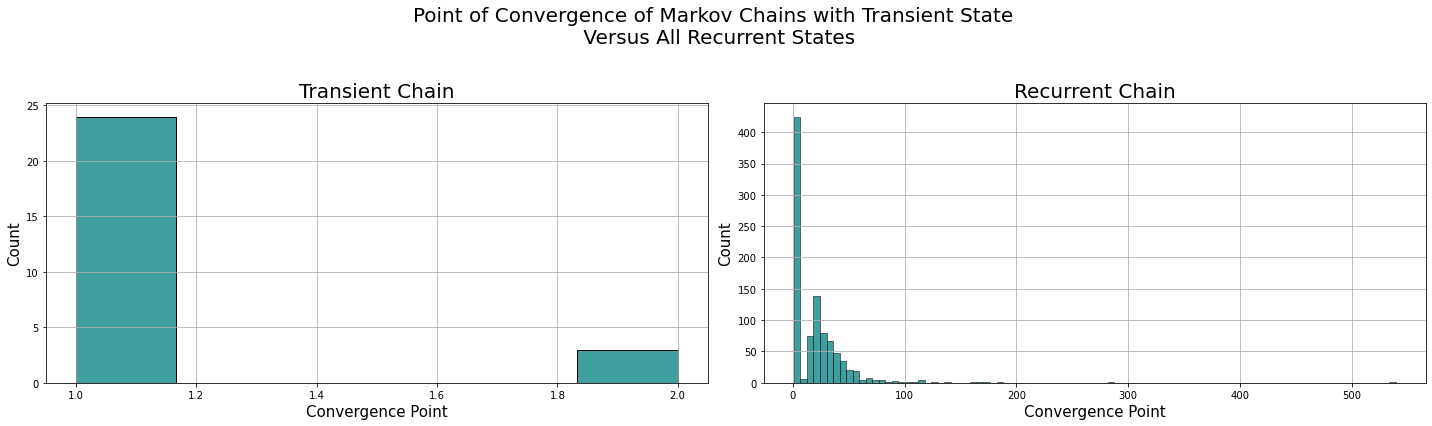

In [658]:
transient(3)  #transient function with state or matrix size of 3  